In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
image_shape=[256, 256]

## GPU 

In [3]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

AUTOTUNE = tf.data.experimental.AUTOTUNE
    
print(tf.__version__)

Device: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2023-11-18 15:46:37.699092: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-18 15:46:37.699199: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-18 15:46:37.699278: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-18 15:46:37.699355: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-18 15:46:37.699432: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-18 15:46:37.699622: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-18 15:46:37.699739: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Number of replicas: 8
2.14.0


# Load Data

In [4]:
data_path = '/kaggle/input/gan-getting-started'
monet_files = tf.io.gfile.glob(str(data_path + '/monet_tfrec/*.tfrec'))
print('Monet TFRecord Files: ', len(monet_files))

photo_files = tf.io.gfile.glob(str(data_path + '/photo_tfrec/*.tfrec'))
print('Photo TFRecord Files:', len(photo_files))

Monet TFRecord Files:  5
Photo TFRecord Files: 20


In [5]:
def print_tfrecord_content(example_proto):
    return tf.train.Example.FromString(example_proto.numpy())

dataset = tf.data.TFRecordDataset([monet_files[0]])

for record in dataset.take(1):
    example = print_tfrecord_content(record)
    print(example.features.feature.keys())

KeysView({'image_name': bytes_list {
  value: "b256e61a5d"
}
, 'image': bytes_list {
  value: "\377\330\377\340\000\020JFIF\000\001\001\001\001,\001,\000\000\377\333\000C\000\002\001\001\001\001\001\002\001\001\001\002\002\002\002\002\004\003\002\002\002\002\005\004\004\003\004\006\005\006\006\006\005\006\006\006\007\t\010\006\007\t\007\006\006\010\013\010\t\n\n\n\n\n\006\010\013\014\013\n\014\t\n\n\n\377\333\000C\001\002\002\002\002\002\002\005\003\003\005\n\007\006\007\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\377\300\000\021\010\001\000\001\000\003\001\021\000\002\021\001\003\021\001\377\304\000\035\000\000\002\003\001\001\001\001\001\000\000\000\000\000\000\000\000\006\007\004\005\010\003\000\t\001\002\377\304\000C\020\000\001\003\003\002\004\004\003\004\t\003\004\002\001\005\000\003\004\005\006\000\007\023\024#\010\0253C\001$Sc\026s\2034\223\243\263\t\021\027%D\303\323\343\360\002&\363\0305Td!E\022(1At\201\377\304\000\033\0

In [6]:
def load_tfr(file):
        
    forma = {'image_name': tf.io.FixedLenFeature([], tf.string),
            'image': tf.io.FixedLenFeature([], tf.string),
            'target': tf.io.FixedLenFeature([], tf.string)}
    
    tfr_image = tf.io.parse_single_example(file, forma)
    
    image = tf.image.decode_jpeg(tfr_image['image'], channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [*image_shape, 3])
    
    return image

dataset_monet = tf.data.TFRecordDataset(monet_files)
dataset_monet = dataset_monet.map(load_tfr, num_parallel_calls=AUTOTUNE).batch(1)

dataset_photo = tf.data.TFRecordDataset(photo_files)
dataset_photo = dataset_photo.map(load_tfr, num_parallel_calls=AUTOTUNE).batch(1)

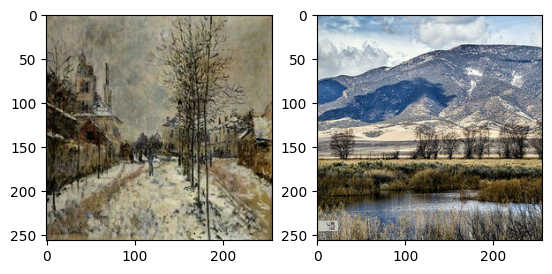

In [7]:
for i in dataset_monet.take(1):
    plt.subplot(121)
    plt.imshow(i[0] * 0.5 + 0.5)
    
for i in dataset_photo.take(1):
    plt.subplot(122)
    plt.imshow(i[0] * 0.5 + 0.5)
plt.show()

# CycleGAN

## Generator

In [8]:
def Res_block(in_x, f):
    
    init = tf.random_normal_initializer(0., 0.02) 
    
    r = layers.Conv2D(f, (3, 3), strides=1, padding='same', kernel_initializer=init)(in_x)
    r = tfa.layers.InstanceNormalization(axis=-1)(r)
    r = layers.Activation('relu')(r)
    
    r = layers.Conv2D(f, (3, 3), strides=1, padding='same', kernel_initializer=init)(r)
    r = tfa.layers.InstanceNormalization(axis=-1)(r)
    
    r = layers.Concatenate()([r, in_x])
    
    return r


def make_generator(res=9):
    
    inp = layers.Input(shape=[*image_shape, 3])
    
    init = tf.random_normal_initializer(0., 0.02)   
    
    x = layers.Conv2D(64, (7, 7), strides=1, padding='same', kernel_initializer=init)(inp)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(128, (3, 3), strides=2, padding='same', kernel_initializer=init)(x)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(256, (3, 3), strides=2, padding='same', kernel_initializer=init)(x)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.Activation('relu')(x)
    
    for i in range(res):
        x = Res_block(x, 256)
        
    x = layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', kernel_initializer=init)(x)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', kernel_initializer=init)(x)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2DTranspose(3, (7, 7), padding='same', kernel_initializer=init)(x)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x_out = layers.Activation('relu')(x)
    
    model = keras.Model(inputs=inp, outputs=x_out)
    return model
    

## Discriminator

In [9]:
def make_discriminator():
    
    inp = layers.Input(shape=[*image_shape, 3])
    init = tf.random_normal_initializer(0, 0.02)   
    
    x = layers.Conv2D(64, (4, 4), strides=2, padding='same', kernel_initializer=init)(inp)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2D(128, (4, 4), strides=2, padding='same', kernel_initializer=init)(x)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2D(256, (4, 4), strides=2, padding='same', kernel_initializer=init)(x)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)  
    
    x = layers.Conv2D(512, (4, 4), strides=2, padding='same', kernel_initializer=init)(x)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2D(512, (4, 4), strides=2, padding='same', kernel_initializer=init)(x)
    x = tfa.layers.InstanceNormalization(axis=-1)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x_out = layers.Conv2D(1, (4, 4), padding='same', kernel_initializer=init)(x)
    
    model = keras.Model(inputs=inp, outputs=x_out)
    return model
    

In [10]:
with strategy.scope():
    monet_generator = make_generator() 
    photo_generator = make_generator() 

    monet_discriminator = make_discriminator() 
    photo_discriminator = make_discriminator()

2023-11-18 15:46:42.778814: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


In [11]:
pic_test = next(iter(dataset_photo))
monet_test = next(iter(dataset_monet))

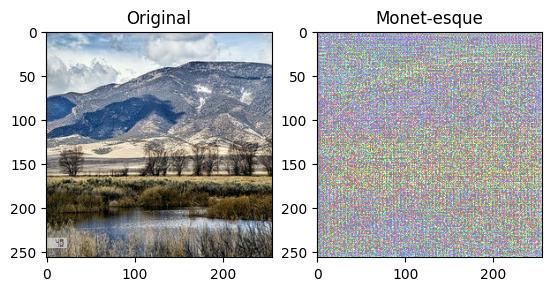

In [12]:
to_monet = monet_generator(pic_test)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(pic_test[0] * 0.5 + 0.5)

plt.subplot(1, 2, 2)
plt.title("Monet-esque")
plt.imshow(to_monet[0] * 0.5 + 0.5)
plt.show()

# Complete model

### Losses

In [13]:
with strategy.scope():
    
    def disc_loss(real, fake):
        
        return tf.reduce_mean((real - fake)**2)
    
    def gen_loss(gen):
        return tf.reduce_mean((tf.ones_like(gen) - gen)**2)
    
    def cycle_loss(real, cycled):
        return tf.reduce_mean(tf.abs(real - cycled))
    
    def id_loss(og, gen):
        return tf.reduce_mean(tf.abs(og - gen))

In [16]:
class CycleGAN(tf.keras.Model):
    
    def __init__(self, monet_g, image_g, monet_d, image_d, input_shape=[256, 256, 3]):
        super(CycleGAN, self).__init__()
        self.monet_g = monet_g
        self.image_g = image_g
        self.monet_d = monet_d
        self.image_d = image_d
        self.in_shape = input_shape

        
    def compile(self, monet_g_opt, image_g_opt, monet_d_opt, image_d_opt, cycle_loss, id_loss, g_loss, d_loss):
        
        super(CycleGAN, self).compile()
        
        self.monet_g_opt = monet_g_opt
        self.image_g_opt = image_g_opt
        self.monet_d_opt = monet_d_opt
        self.image_d_opt = image_d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        self.cycle_loss = cycle_loss
        self. id_loss = id_loss
        
        
    def train_step(self, batch):
        
        real_monet, real_image = batch
        
        with tf.GradientTape(persistent=True) as tp:
            
            gen_monet = self.monet_g(real_image)
            gen_image = self.image_g(real_monet)

            monet_d_real = self.monet_d(real_monet)
            monet_d_fake = self.monet_d(gen_monet)

            image_d_real = self.image_d(real_image)
            image_d_fake = self.image_d(gen_image)

            cycled_m = self.monet_g(gen_image)
            cycled_image = self.image_g(gen_monet)
            
            id_m = self.monet_g(real_monet)
            id_i = self.image_g(real_image)
            
            # Losses
            
            # Adversarial            
            monet_g_loss = self.g_loss(monet_d_fake)
            image_g_loss = self.g_loss(image_d_fake)
            
            # Cycle
            cycle_loss = 10 * self.cycle_loss(real_image, cycled_image) + 10 * self.cycle_loss(real_monet, cycled_m)
                        
            # Identity
            monet_id_loss = 5 * self.id_loss(real_monet, id_m)
            image_id_loss = 5 * self.id_loss(real_image, id_i)
            
            # Total G loss
            monet_g_total = monet_g_loss + cycle_loss + monet_id_loss
            image_g_total = image_g_loss + cycle_loss + image_id_loss
            
            # Disc loss
            monet_d_loss = self.d_loss(real=monet_d_real, fake=monet_d_fake)
            image_d_loss = self.d_loss(real=image_d_real, fake=image_d_fake)
            
        # Gradients
        
        monet_g_grad = tp.gradient(monet_g_total, self.monet_g.trainable_variables)
        image_g_grad = tp.gradient(image_g_total, self.image_g.trainable_variables)
        
        monet_d_grad  = tp.gradient(monet_d_loss, self.monet_d.trainable_variables)
        image_d_grad = tp.gradient(image_d_loss, self.image_d.trainable_variables)
        
        self.monet_g_opt.apply_gradients(zip(monet_g_grad, self.monet_g.trainable_variables))
        self.image_g_opt.apply_gradients(zip(image_g_grad, self.image_g.trainable_variables))
        self.monet_d_opt.apply_gradients(zip(monet_d_grad, self.monet_d.trainable_variables))
        self.image_d_opt.apply_gradients(zip(image_d_grad, self.image_d.trainable_variables))
        
        return {'monet_g_loss': monet_g_total,
               'image_g_loss': image_g_total,
               'monet_d_loss': monet_d_loss,
               'image_d_loss': image_d_loss}
            
        
        

In [20]:
with strategy.scope():
    
    monet_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

    monet_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    
    cycle_gan_model = CycleGAN(
        monet_generator, photo_generator, monet_discriminator, photo_discriminator
    )

    cycle_gan_model.compile(
        monet_g_opt = monet_generator_optimizer,
        image_g_opt = photo_generator_optimizer,
        monet_d_opt = monet_discriminator_optimizer,
        image_d_opt = photo_discriminator_optimizer,
        g_loss = gen_loss,
        d_loss = disc_loss,
        cycle_loss = cycle_loss,
        id_loss = id_loss
    )

In [ ]:
cycle_gan_model.fit(
    tf.data.Dataset.zip((dataset_monet, dataset_photo)),
    epochs=100
)

Epoch 1/100


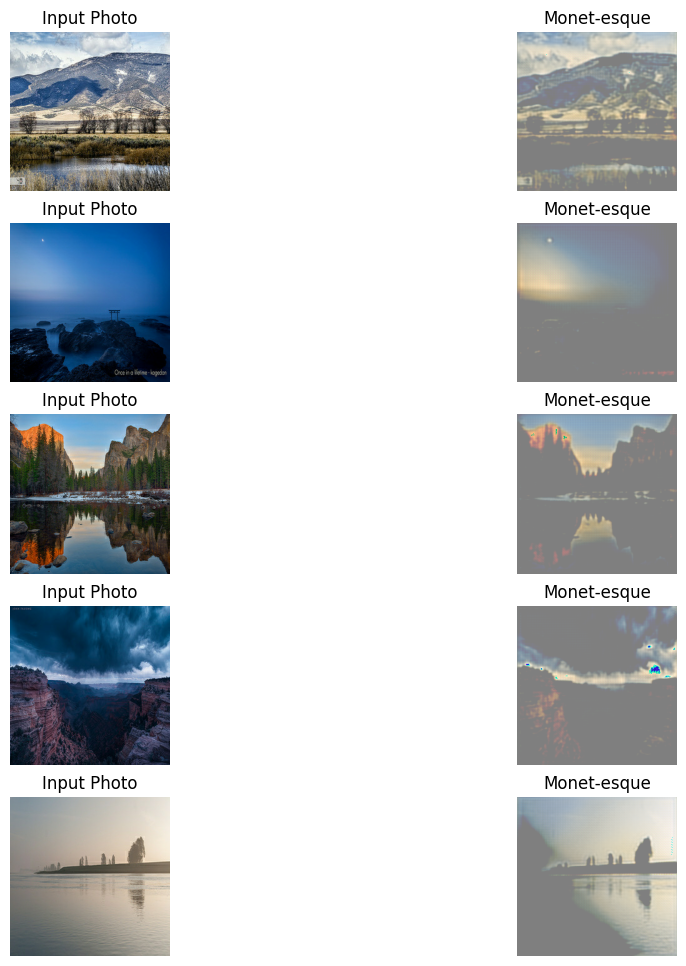

In [19]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(dataset_photo.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()